In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as mt
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

# EDA

In [2]:
df_train = pd.read_csv('titanic_train.csv',
                       index_col='PassengerId')  # считаем данные трейна
df_train = pd.concat([df_train.iloc[:, 1:], df_train['Survived']],
                     axis=1)  # сделаем таргет последним столбцом
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [3]:
df_test = pd.read_csv('titanic_test.csv')  # считаем данные тестовой выборки
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [6]:
df_train.dtypes

Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [8]:
print(df_train['Ticket'].nunique())

681

0    549
1    342
Name: Survived, dtype: int64

0    577
1    314
Name: Sex, dtype: int64


In [7]:
df_train.isna().sum()  # проверим наличие пропусков

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [8]:
df_train['Embarked'].fillna(df_train['Embarked'].mode().loc[0], inplace=True)

In [9]:
# заполним пропуски в возрасте, используем медианный возраст 
# каждого пола внутри каждого пассажирского класса
fill_age = np.zeros((2, 3))

for i in range(0, 2):
    for j in range(1, 4):
        age_fill = df_train[(df_train['Sex'] == i) & \
                            (df_train['Pclass'] == j)]['Age'].median() #.dropna()
        # Convert random age float to nearest .5 age
        fill_age[i, j-1] = int(age_fill / 0.5 + 0.5) * 0.5

for i in range(0, 2):
    for j in range(1, 4):
        df_train.loc[(df_train.Age.isnull()) & (df_train.Sex == i) &
                       (df_train.Pclass == j), 'Age'] = fill_age[i, j-1]

df_train['Age'] = df_train['Age'].astype(int)
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0


In [10]:
# добавим признак с размером семьи и бинарный признак,
# указывающий был ли человек без семьи 
df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['Is_alone'] = df_train['Family_size'].apply(lambda x: int(x == 1))
df_train = df_train.loc[:, ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 
                     'Fare', 'Cabin', 'Embarked', 'Family_size', 'Is_alone', 'Survived']]
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Survived
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,2,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,2,0,1
3,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,2,0,1
5,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,1,1,0
888,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,1,1,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,W./C. 6607,23.4500,NaN,S,4,0,0


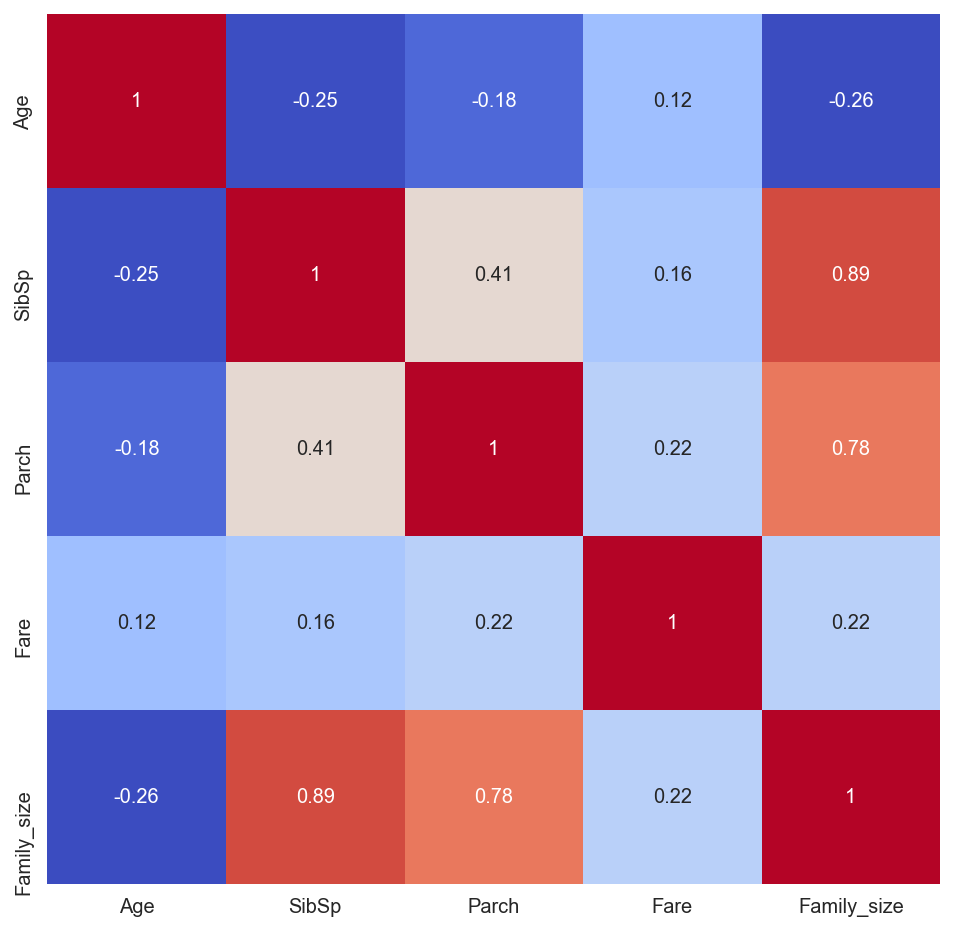

In [9]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_train.iloc[:, :-1].drop(columns=['Sex', 'Pclass', 'Is_alone']).corr(), 
            annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [10]:
df_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Is_alone,Survived
Pclass,1.000000,-0.131900,-0.414682,0.083081,0.018443,-0.549500,0.065997,0.135207,-0.338481
Sex,-0.131900,1.000000,-0.104584,0.114631,0.245489,0.182333,0.200988,-0.303646,0.543351
Age,-0.414682,-0.104584,1.000000,-0.250248,-0.175708,0.123250,-0.258817,0.175791,-0.060291
SibSp,0.083081,0.114631,-0.250248,1.000000,0.414838,0.159651,0.890712,-0.584471,-0.035322
Parch,0.018443,0.245489,-0.175708,0.414838,1.000000,0.216225,0.783111,-0.583398,0.081629
Fare,-0.549500,0.182333,0.123250,0.159651,0.216225,1.000000,0.217138,-0.271832,0.257307
Family_size,0.065997,0.200988,-0.258817,0.890712,0.783111,0.217138,1.000000,-0.690922,0.016639
Is_alone,0.135207,-0.303646,0.175791,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.203367
Survived,-0.338481,0.543351,-0.060291,-0.035322,0.081629,0.257307,0.016639,-0.203367,1.000000


### Отрисуем бар плоты для категориальных фичей

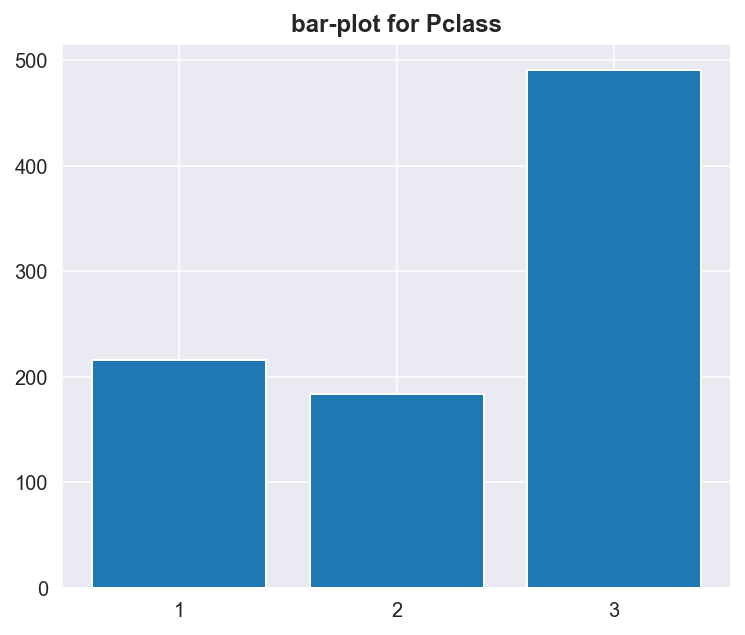

In [11]:
def bar_plt(col_name, figsize=(6, 5), tick_label=None):
    col_vc = df_train[col_name].value_counts().sort_index()
    plt.figure(figsize=figsize)
    plt.bar(col_vc.index, col_vc.values, tick_label=tick_label)
    plt.title(f'bar-plot for {col_name}', fontsize=12, weight='bold')
    plt.show()
    
bar_plt('Pclass', tick_label=['1', '2', '3'])

Явный дисбаланс: значительное преобладание билетов 3 класса

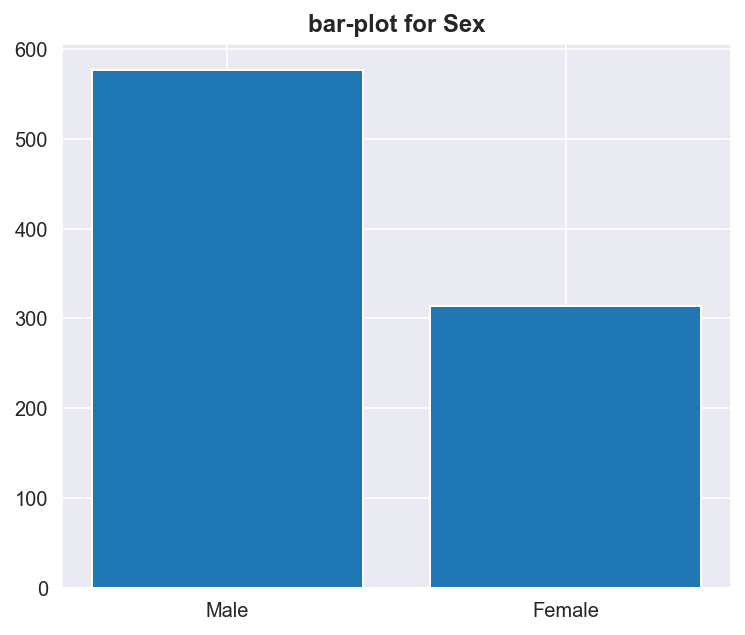

In [17]:
bar_plt('Sex', tick_label=['Male', 'Female'])

Больше мужчин

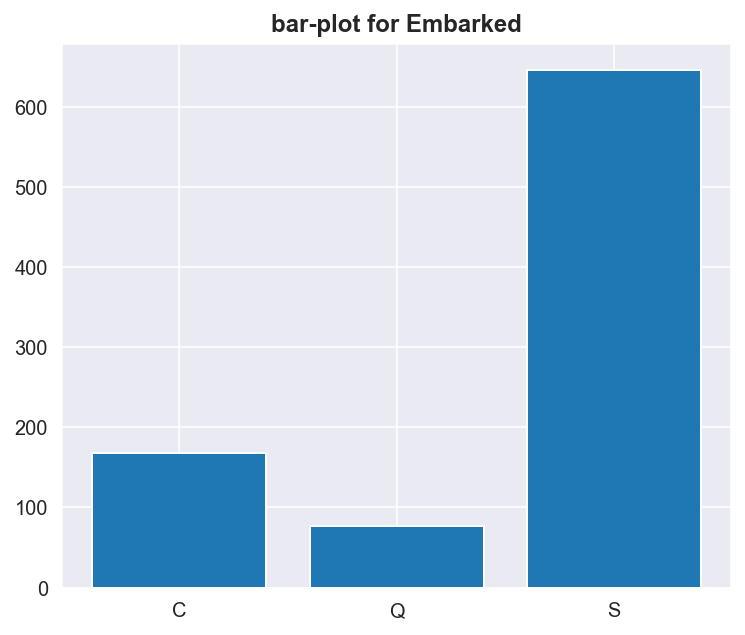

In [14]:
bar_plt('Embarked')

Явный дисбаланс: значительное преобладание севших в порте S (Southampton)

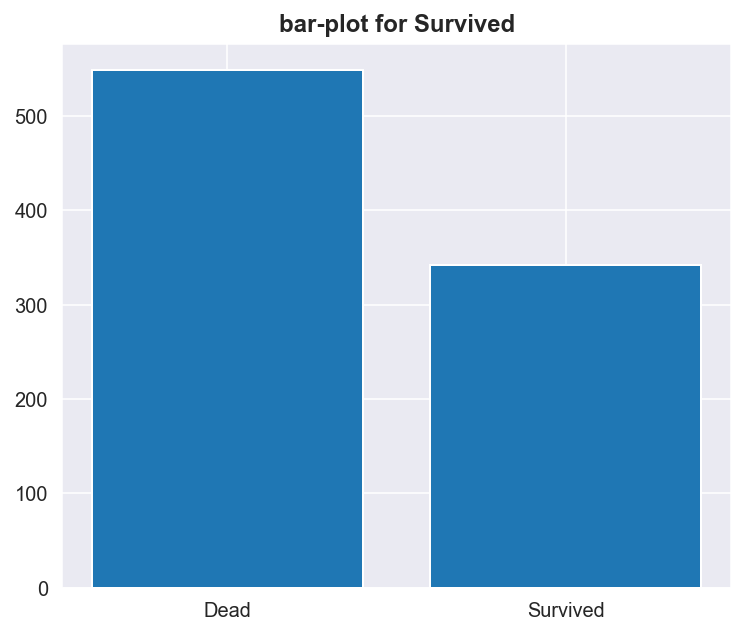

In [14]:
bar_plt('Survived', tick_label=['Dead', 'Survived'])

В таргете также дисбаланс

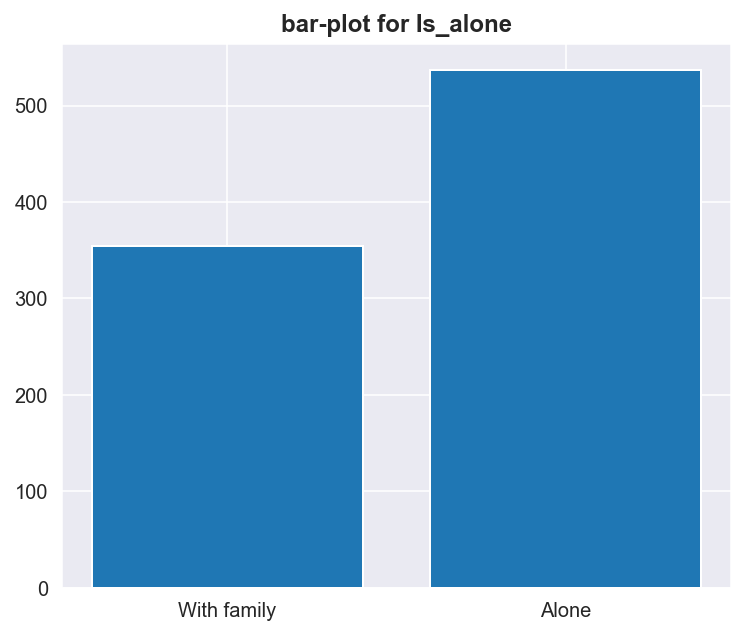

In [13]:
bar_plt('Is_alone', tick_label=['With family', 'Alone'])

Заметное преобладание одиноких

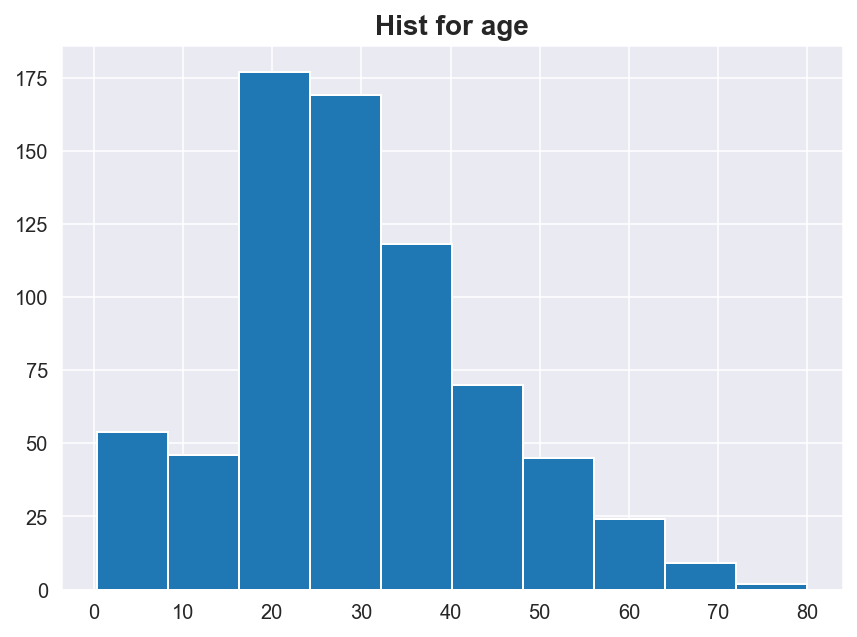

In [18]:
plt.figure(figsize=(7, 5))
df_train['Age'].hist()
plt.title('Hist for age', fontsize=14, weight='bold')
plt.show()

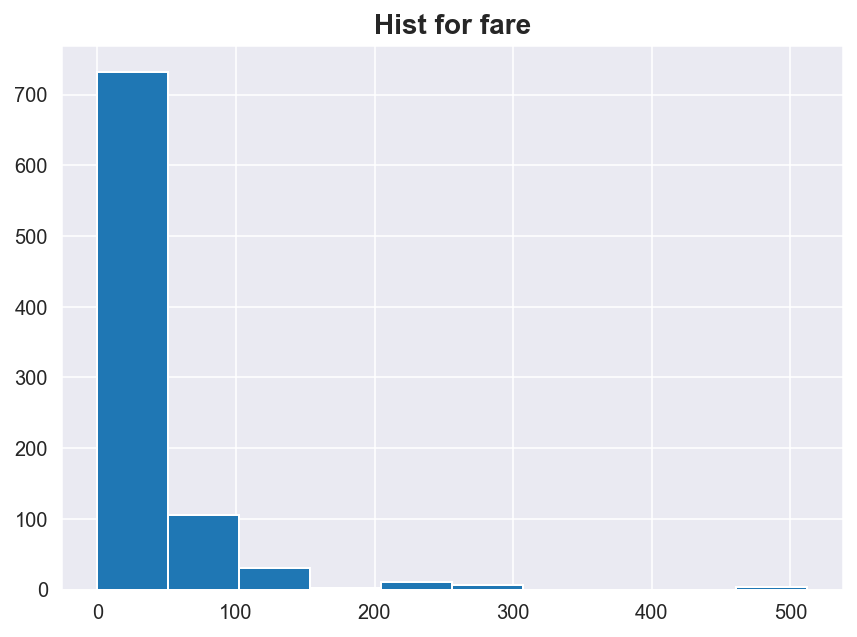

In [19]:
plt.figure(figsize=(7, 5))
df_train['Fare'].hist()
plt.title('Hist for fare', fontsize=14, weight='bold')
plt.show()

In [14]:
df_train[df_train['Fare'] > 100].shape[0] / df_train.shape[0] 

0.05948372615039282

доля пассажиров с билетами ценой больше 100 около 6% в трейне. В тесте примерно та же ситуация:

In [15]:
df_test[df_test['Fare'] > 100].shape[0] / len(df_test)

0.07416267942583732

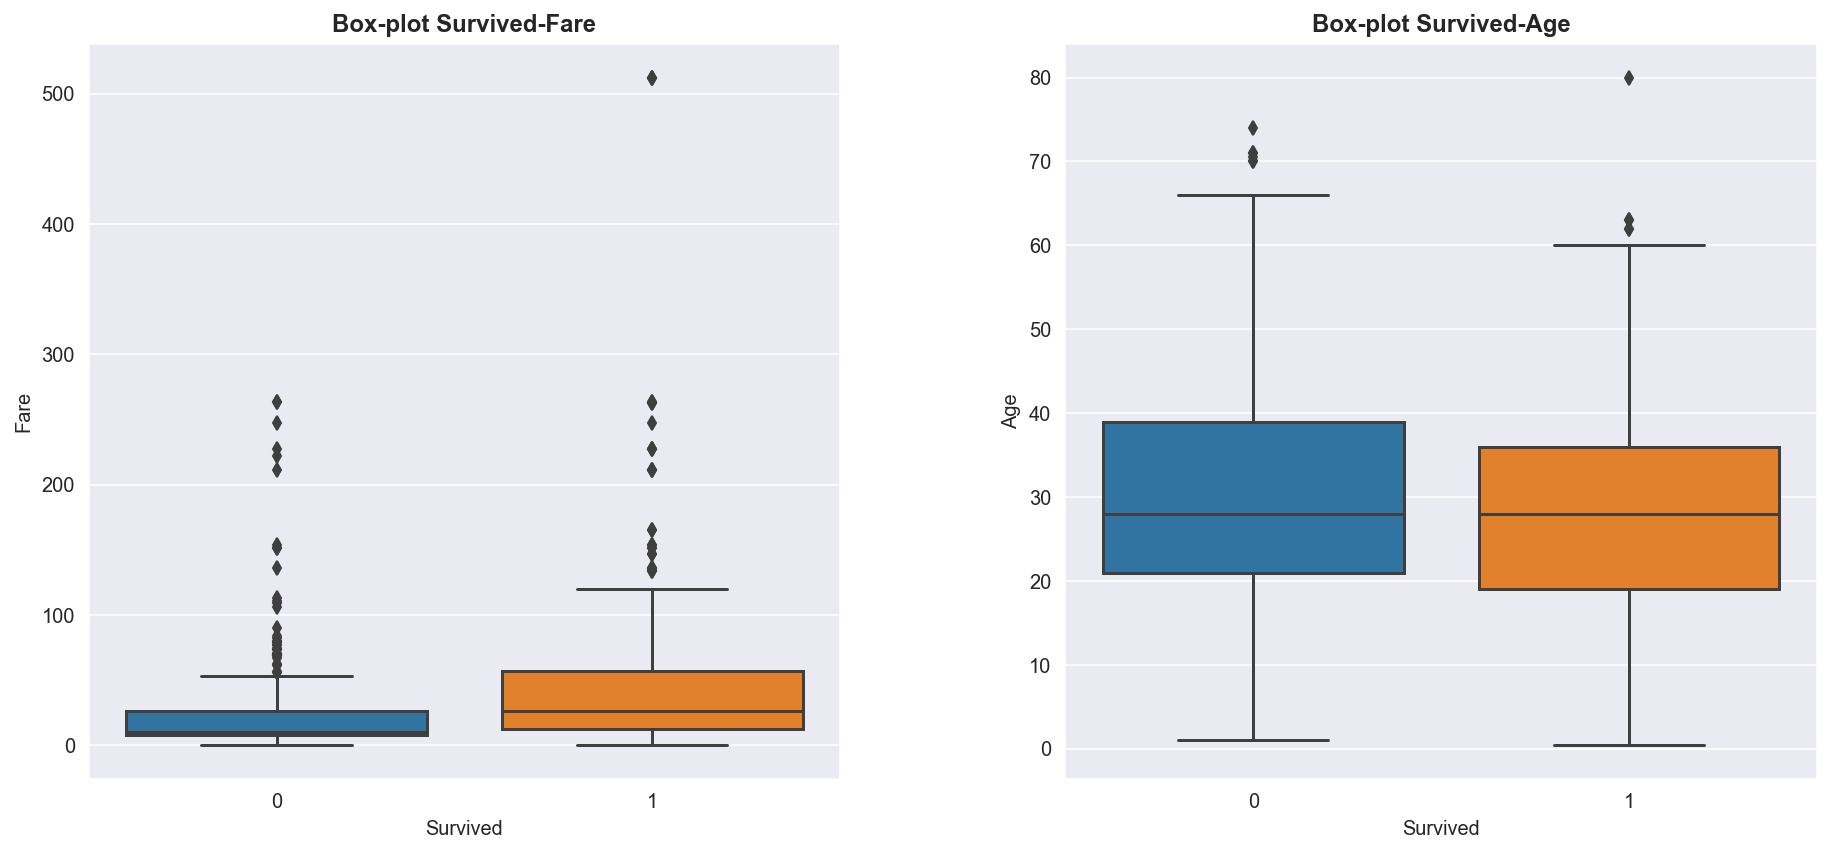

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=df_train, ax=ax[0])
ax[0].set_title('Box-plot Survived-Fare', weight='bold')
sns.boxplot(x='Survived', y='Age', data=df_train, ax=ax[1])
ax[1].set_title('Box-plot Survived-Age', weight='bold')
fig.subplots_adjust(left=0, right=1, bottom=0.1, top=0.95,
                    hspace=0.4, wspace=0.3)
plt.show()

In [28]:
df_train[df_train['Fare'] >= 200].sort_values(by='Fare')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
780,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",1,43.0,0,1,24160,211.3375,B3,S,1
731,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,S,1
690,1,"Madill, Miss. Georgette Alexandra",1,15.0,0,1,24160,211.3375,B5,S,1
378,1,"Widener, Mr. Harry Elkins",0,27.0,0,2,113503,211.5000,C82,C,0
528,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,S,0
717,1,"Endres, Miss. Caroline Louise",1,38.0,0,0,PC 17757,227.5250,C45,C,1
701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",1,18.0,1,0,PC 17757,227.5250,C62 C64,C,1
381,1,"Bidois, Miss. Rosalie",1,42.0,0,0,PC 17757,227.5250,NaN,C,1
558,1,"Robbins, Mr. Victor",0,NaN,0,0,PC 17757,227.5250,NaN,C,0


In [29]:
df_train[df_train['Fare'] >= 200]['Survived'].mean()

0.7

In [30]:
df_train.select_dtypes('number').describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [14]:
# df_train[df_train['Name'].str.startswith('Fortune')]

In [32]:
# проверка банальных ошибок в данных, связанных с полом
any(df_train.apply(lambda x: (x.Name.split()[1] in ('Miss.', 'Mrs.') and x.Sex == 0) or
               (x.Name.split()[1] in ('Mr.', 'Master.') and x.Sex == 1), axis=1))

False

In [17]:
# # посчитаем долю выживших с одинаковым билетом
# df_mean_surv = df_train.groupby('Ticket').mean()['Survived'] \
#                        .to_frame().rename(columns={'Survived': 'Mean_survived'})
# df_train = df_train.join(df_mean_surv, on='Ticket', how='inner', lsuffix='', rsuffix='_j')
# df_train.sort_index(inplace=True)

In [14]:
# s = df_train[df_train['Name'].str.contains('Miss', regex=False)]['Age'].isna()
# df_train.loc[s[s].index]

In [12]:
df = df_train.copy()
df = df.reset_index().drop(columns='PassengerId')

In [14]:
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split()[0])
df['Title'].value_counts()  # посчитаем число людей с разной приставкой к имени

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

"the" - соответствует "the Countess"

In [15]:
value_cnt = df['Title'].value_counts()
value_cnt[value_cnt < 10]

Dr.          7
Rev.         6
Mlle.        2
Major.       2
Col.         2
the          1
Capt.        1
Ms.          1
Sir.         1
Lady.        1
Mme.         1
Don.         1
Jonkheer.    1
Name: Title, dtype: int64

In [16]:
df[df['Title'].isin(value_cnt[(value_cnt < 10)
                              & (value_cnt > 1)].index)].groupby('Title').agg(
                                  {'Survived': 'mean'})

,Survived
Title,
Col.,0.500000
Dr.,0.428571
Major.,0.500000
Mlle.,1.000000
Rev.,0.000000


In [17]:
# избавимся от кучи приставок, которым соответствует мало пассажиров
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].apply(lambda x: x if value_cnt.loc[x] > 10 else 'other')
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Survived,Title
0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,2,0,0,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,2,0,1,Mrs.
2,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,2,0,1,Mrs.
4,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1,1,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,1,1,0,other
887,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,1,1,1,Miss.
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,W./C. 6607,23.4500,NaN,S,4,0,0,Miss.
889,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,1,1,1,Mr.


In [18]:
df['Cabin_isnan'] = df['Cabin'].isna().apply(lambda x: int(x))
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Survived,Title,Cabin_isnan
0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,2,0,0,Mr.,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,2,0,1,Mrs.,0
2,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,Miss.,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,2,0,1,Mrs.,0
4,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,1,1,0,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S,1,1,0,other,1
887,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S,1,1,1,Miss.,0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,W./C. 6607,23.4500,NaN,S,4,0,0,Miss.,1
889,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C,1,1,1,Mr.,0


In [19]:
df.isna().sum()

Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_size      0
Is_alone         0
Survived         0
Title            0
Cabin_isnan      0
dtype: int64

In [20]:
value_cnt = value_cnt.append(pd.Series([0], index=['Dona.'])) # Dona есть только в тестовой

df_test['Title'] = df_test['Name'].apply(lambda x: x.split(', ')[1].split()[0])
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].apply(lambda x: 
                                          x if value_cnt.loc[x] > 10 else 'other')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,other
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr.


## подготовим тестовый датасет (по той же логике, что и трейн)

In [4]:
# функция препроцессинга
def prep(df):
    df['Sex'] = df['Sex'].apply(
        lambda x: 0 if x == 'male' else 1)  # заменим категории пол на 0, 1
    df['Embarked'].fillna(df['Embarked'].mode().loc[0], 
                          inplace=True)  # заполним пропуски в embarked (место посадки) модой
    # ниже для каждого пола и разных возрастных категорий
    # заполняю пропуски средним по данной категории и полу
    fill_age = np.zeros((2, 3))
    for i in range(0, 2):
        for j in range(1, 4):
            age_fill = df[(df['Sex'] == i) & \
                          (df['Pclass'] == j)]['Age'].median() #.dropna()
            fill_age[i, j-1] = int(age_fill / 0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(1, 4):
            df.loc[(df.Age.isnull()) & (df.Sex == i) &
                   (df.Pclass == j), 'Age'] = fill_age[i, j-1]

    df['Age'] = df['Age'].astype(int)
    
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    df['Is_alone'] = df['Family_size'].apply(lambda x: int(x == 1))
    # df = df.reset_index().drop(columns='PassengerId')
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # пропуски в стоимости билета заполним средним
    df['Cabin_isnan'] = df['Cabin'].isna().apply(lambda x: int(x))
    print(df.isna().sum())

In [21]:
prep(df_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Family_size      0
Is_alone         0
Cabin_isnan      0
dtype: int64


# Train-validation split

In [25]:
from sklearn.model_selection import train_test_split
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 
            'Title', 'Family_size', 'Is_alone', 'Cabin_isnan'] 
X = df[features]
y = df['Survived']

In [26]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Fare', 'Family_size']
categorical = ['Pclass', 'Sex', 'Embarked', 'Title', 
               'Is_alone', 'Cabin_isnan']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

# SVM

In [28]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps=[
     ('transf', column_transformer),
     ('SVM', SVC(C=0.01, kernel='linear'))
 ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

a = pipeline.decision_function(X_val)
P = (a - a.min())/(a.max() - a.min())

precision, recall, thresholds = metrics.precision_recall_curve(y_val, P)
auc_pr = metrics.auc(recall, precision)
acc = metrics.accuracy_score(y_val, y_pred)
print('AUC-PR для дефолтного SVM (с линейным ядром) = {:.2f}'.format(auc_pr))
print('Accuracy для дефолтного SVM (с линейным ядром) = {:.2f}'.format(acc))

AUC-PR для дефолтного SVM (с линейным ядром) = 0.85
Accuracy для дефолтного SVM (с линейным ядром) = 0.78


In [29]:
X_train_transf = column_transformer.fit_transform(X_train)

In [30]:
print('amount of features before transf:', X_train.shape[1])
print('amount of features after transf:', X_train_transf.shape[1])

amount of features before transf: 9
amount of features after transf: 20


## GridSearch for SVM

In [33]:
from sklearn.model_selection import GridSearchCV

c_set = np.linspace(0.8, 1.2, 40)
searcher = GridSearchCV(SVC(kernel='linear'), [{"C": c_set}], 
                        scoring='accuracy', cv=10)

searcher.fit(X_train_transf, y_train)

best_c = searcher.best_params_["C"]
best_score = searcher.best_score_
print("Best C = %.4f" % best_c)
print("Best Accuracy = %.4f" % best_score)

Best C = 0.8821
Best Accuracy = 0.8371


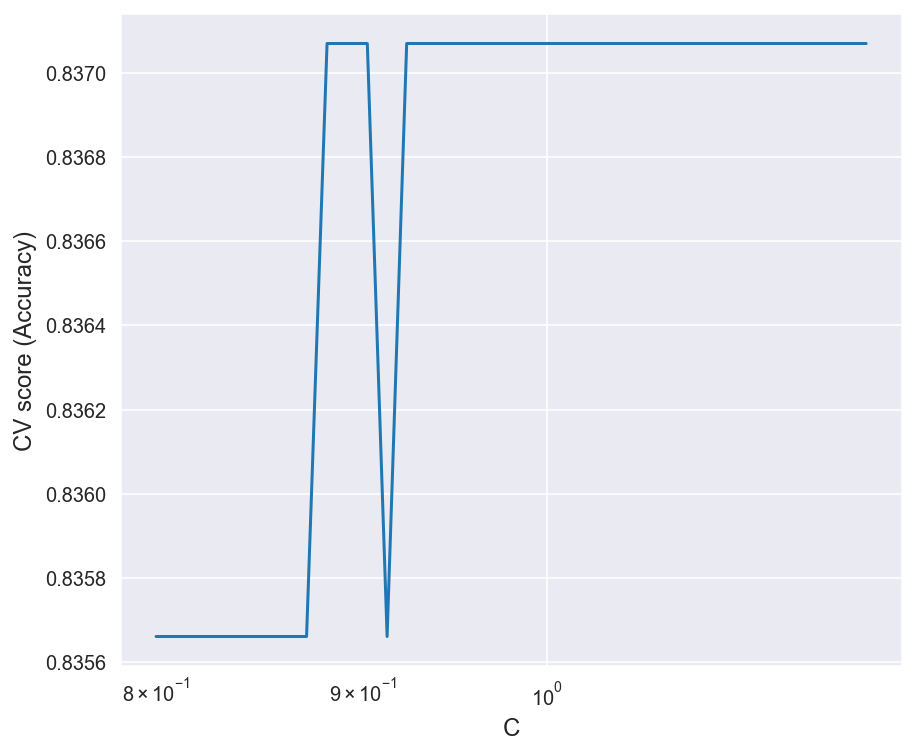

In [34]:
plt.figure(figsize=(7, 6))
plt.plot(c_set, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("С", fontsize=12)
plt.ylabel("CV score (Accuracy)", fontsize=12)
plt.show()

In [35]:
X_val_transf = column_transformer.transform(X_val)
svm_best = SVC(C=best_c, kernel='linear')
svm_best.fit(X_train_transf, y_train)
y_pred_best = svm_best.predict(X_val_transf)

print('CV based SVM accuracy = {:.2f}'.format(metrics.accuracy_score(y_val, y_pred_best)))

CV based SVM accuracy = 0.83


AUC-PR для SVM с C из кросс-валидации = 0.81056
AUC-ROC для SVM с C из кросс-валидации = 0.85946


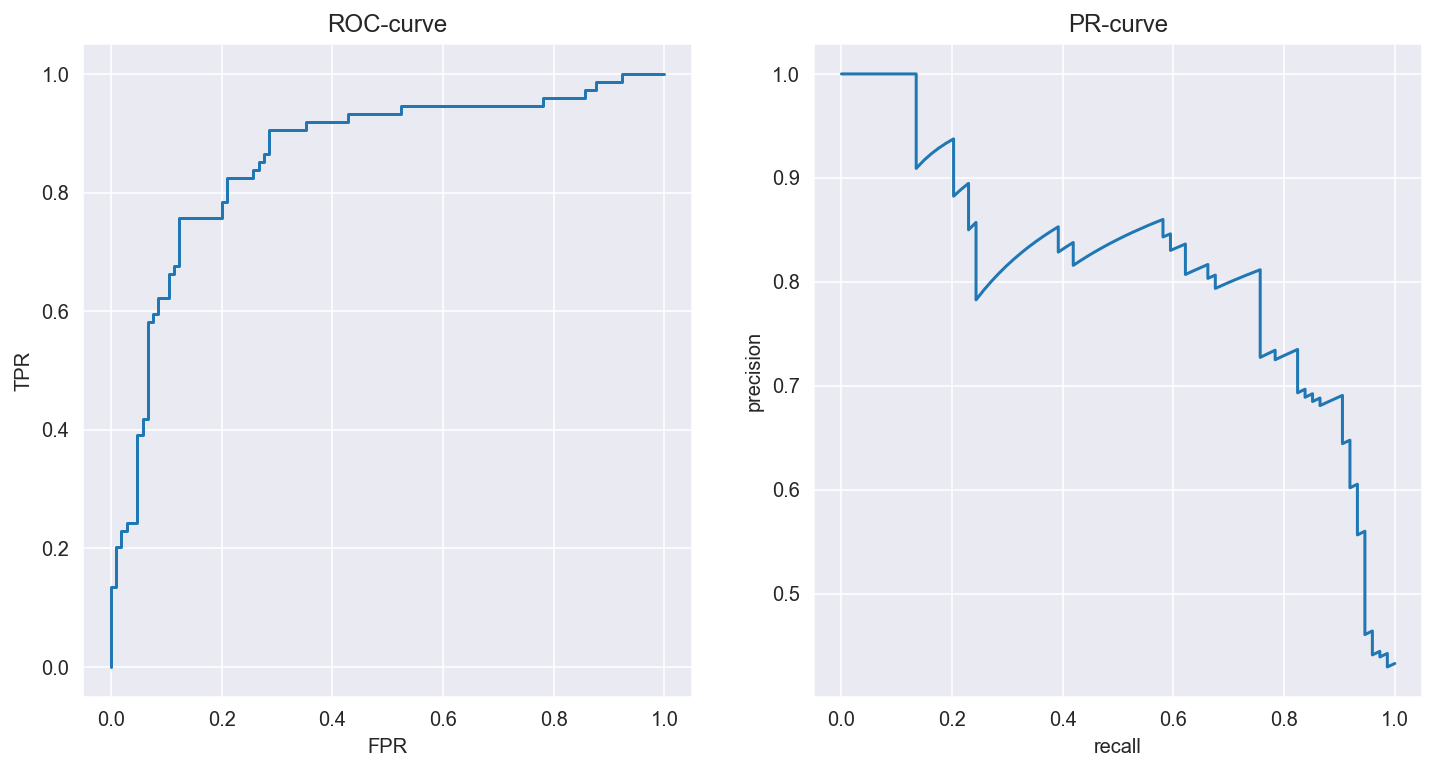

In [36]:
def roc_pr_plot(X_test, y_test, model):
    a = model.decision_function(X_test)
    P = (a - a.min())/(a.max() - a.min())

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, P)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, P)
    print('AUC-PR для SVM с C из кросс-валидации = %.5f' % metrics.auc(recall, precision))
    print('AUC-ROC для SVM с C из кросс-валидации = %.5f' % metrics.auc(fpr, tpr))


    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(fpr, tpr)
    ax[0].set_xlabel('FPR')
    ax[0].set_ylabel('TPR')
    ax[0].set_title('ROC-curve')

    ax[1].plot(recall, precision)
    ax[1].set_xlabel('recall')
    ax[1].set_ylabel('precision')
    ax[1].set_title('PR-curve')
    plt.show()
    
roc_pr_plot(X_val_transf, y_val, svm_best)

## predicting for test data using SVM model

In [37]:
X_test = df_test[features]
X_test_transf = column_transformer.transform(X_test)
X_test_transf

array([[ 0.        ,  0.        ,  1.        , ...,  0.38530051,
        -0.47671165, -0.55466613],
       [ 0.        ,  0.        ,  1.        , ...,  1.3631841 ,
        -0.49267837,  0.04009635],
       [ 0.        ,  1.        ,  0.        , ...,  2.49151133,
        -0.44092902, -0.55466613],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.68618777,
        -0.48786448, -0.55466613],
       [ 0.        ,  0.        ,  1.        , ..., -0.36691765,
        -0.47246002, -0.55466613],
       [ 0.        ,  0.        ,  1.        , ..., -0.36691765,
        -0.19694553,  0.63485883]])

In [38]:
predictions = svm_best.predict(X_test_transf)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_svm.csv', index=False)

In [39]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Logreg

In [40]:
lr = LogisticRegression(random_state=42)

In [43]:
c_set = np.linspace(0.1, 0.3, 40)
searcher = GridSearchCV(lr, [{"C": c_set}], 
                        scoring='accuracy', cv=10)

searcher.fit(X_train_transf, y_train)

best_c = searcher.best_params_["C"]
best_score = searcher.best_score_
print("Best C = %.4f" % best_c)
print("Best Accuracy = %.4f" % best_score)

Best C = 0.1564
Best Accuracy = 0.8385


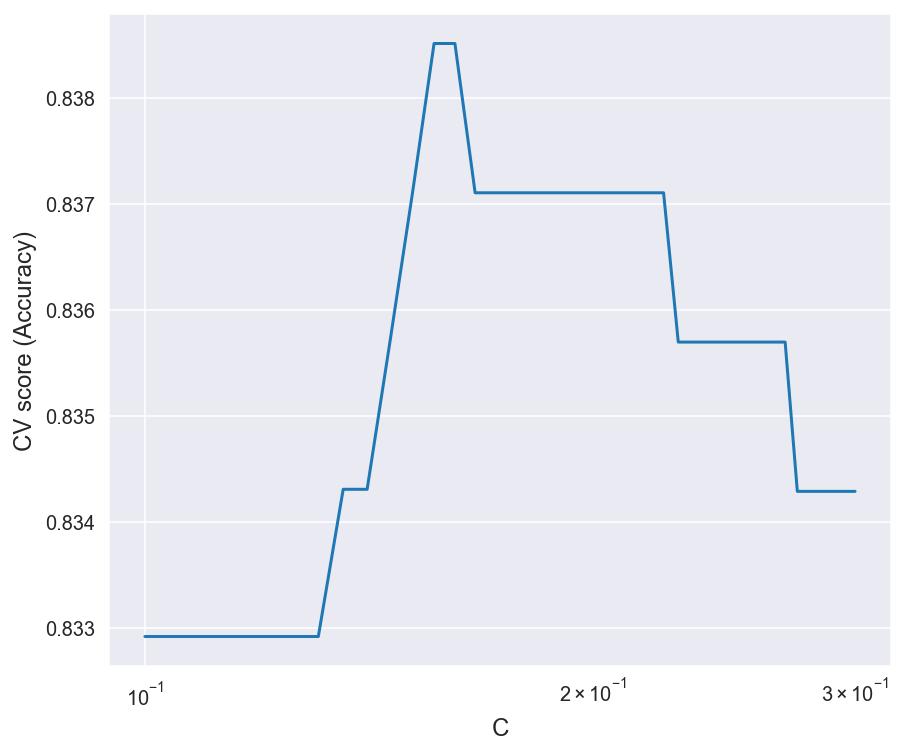

In [44]:
plt.figure(figsize=(7, 6))
plt.plot(c_set, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("С", fontsize=12)
plt.ylabel("CV score (Accuracy)", fontsize=12)
plt.show()

In [45]:
lr_best = LogisticRegression(C=best_c)
lr_best.fit(X_train_transf, y_train)
y_pred_best = svm_best.predict(X_val_transf)

In [46]:
def print_metrics(model, y_val, X_val, y_pred):
    print('accuracy = {:.5f}'.format(metrics.accuracy_score(y_val, y_pred)))
    print('F1 score = {:.5f}'.format(metrics.f1_score(y_val, y_pred)))

    precision, recall, thresholds = metrics.precision_recall_curve(y_val, 
                                                                   model.predict_proba(X_val)[:, 1])
    fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    print('AUC-PR = %.5f' % metrics.auc(recall, precision))
    print('AUC-ROC = %.5f' % metrics.auc(fpr, tpr))

print_metrics(lr_best, y_val, X_val_transf, y_pred_best)

accuracy = 0.82682
F1 score = 0.78322
AUC-PR = 0.85552
AUC-ROC = 0.88340


In [47]:
lr_best.coef_

array([[ 0.24099837,  0.32202454, -0.56301052, -0.70733171,  0.7073441 ,
         0.21405974, -0.00132592, -0.21272142,  0.67829337, -0.07869893,
        -1.08264377,  0.66788456, -0.18482284,  0.09989135, -0.09987896,
         0.42414995, -0.42413756, -0.28971558,  0.22174392, -0.57994048]])

In [48]:
column_transformer.transformers_[1][2]

['Age', 'Fare', 'Family_size']

In [49]:
ohe_feat_names = column_transformer.transformers_[0][1].get_feature_names()
scal_feat_names = column_transformer.transformers_[1][2]
feat_coef = {}
coefs = list(lr_best.coef_[0])
for i, el in enumerate(ohe_feat_names):
    ohe_feat_names[i] = categorical[int(el[1])] + ' ' + el.split('_')[1]

In [50]:
ohe_feat_names_lst = list(map(lambda x: x + '(categor)', ohe_feat_names))
numeric_features_lst = list(map(lambda x: x + '(numeric)', numeric_features)) 

In [51]:
cols_coefs = list(zip(ohe_feat_names_lst + numeric_features_lst, lr_best.coef_[0]))
cols_coefs_sorted = sorted(cols_coefs, key=lambda x: abs(x[1]), reverse=True) 

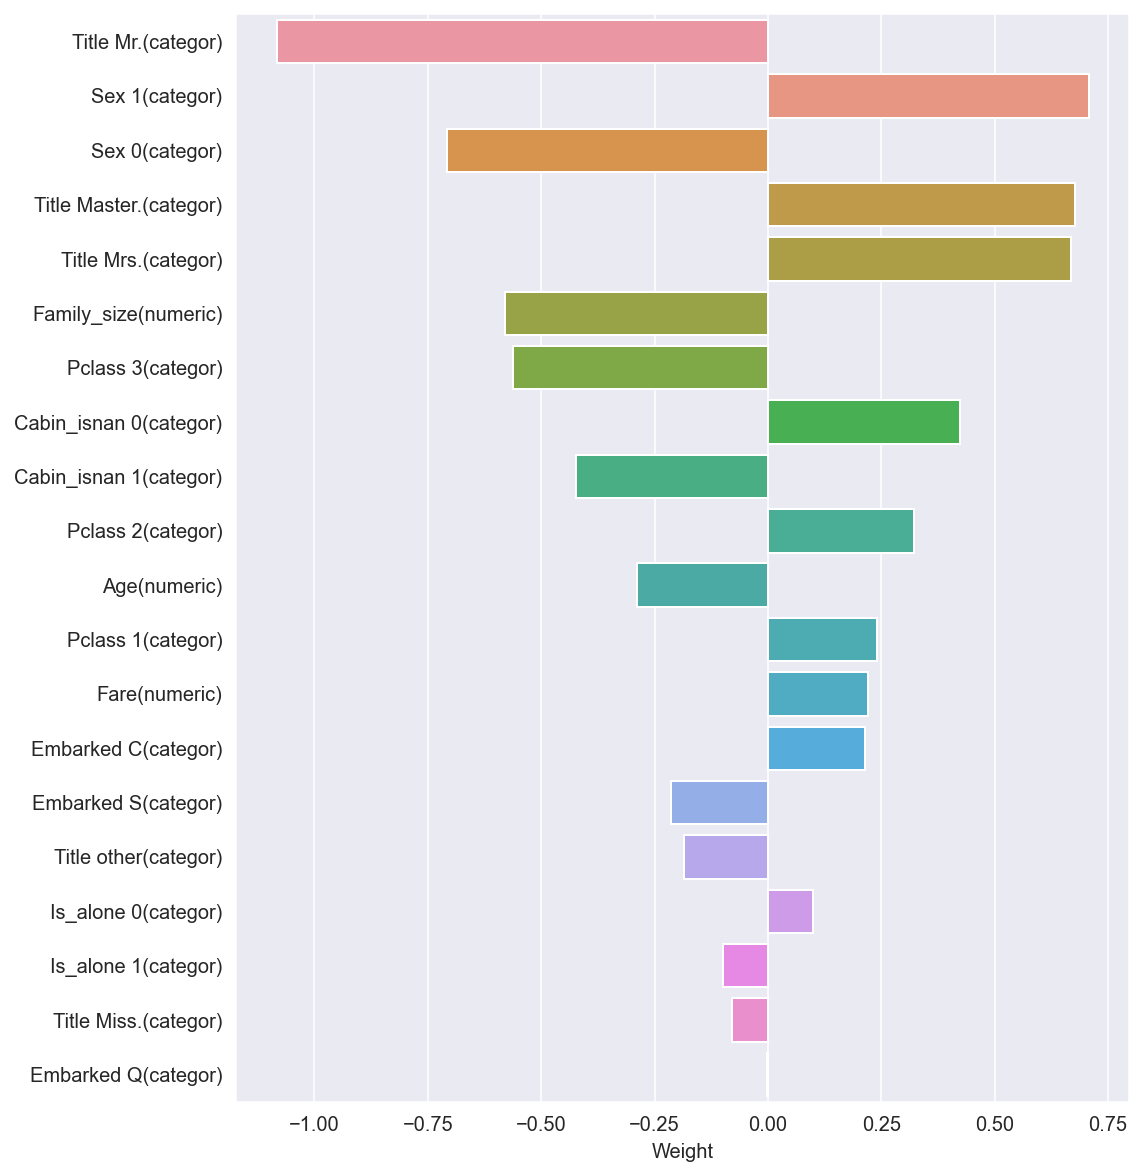

In [52]:
def show_weights(features_weights):
    plt.figure(figsize=(8, 10))
    weights = [x[1] for x in features_weights[:30]]
    features = [x[0] for x in features_weights[:30]]
    sns.barplot(y=features, x=weights)
    plt.xlabel("Weight")
    plt.show()

# выведем 30 фичей с макс. по модулю коэфф-ми
show_weights(cols_coefs_sorted)

In [53]:
predictions = lr_best.predict(X_test_transf)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_lr.csv', index=False)

# Decision Trees

## default stuff

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_transf, y_train)
y_pred = tree.predict(X_val_transf)

In [55]:
print_metrics(tree, y_val, X_val_transf, y_pred)

accuracy = 0.81564
F1 score = 0.78146
AUC-PR = 0.81622
AUC-ROC = 0.81622


## GridSearch for DT

In [56]:
def grid_search(model, X, y, params, scoring='accuracy', nfolds=5):    
    #use gridsearch to test all values
    gscv = GridSearchCV(model, params, scoring=scoring, cv=nfolds, n_jobs=-1)
    #fit model to data
    gscv.fit(X, y)
    print('%.5f' % gscv.best_score_)
    return gscv.best_params_

param_grid = {'criterion':['gini', 'entropy'], 
              'max_depth': np.arange(1, 12), 
              'min_samples_leaf': np.arange(5, 19, 2),
              'min_samples_split': np.arange(2, 10)}
tree = DecisionTreeClassifier(random_state=42)
best_params_dtree = grid_search(tree, X_train_transf, y_train, param_grid, nfolds=10)

0.82165


In [57]:
best_params_dtree

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [58]:
best_tree = DecisionTreeClassifier(**{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}, 
                                   random_state=42)
best_tree.fit(X_train_transf, y_train)
y_pred = best_tree.predict(X_val_transf)

print_metrics(best_tree, y_val, X_val_transf, y_pred)

accuracy = 0.82123
F1 score = 0.77465
AUC-PR = 0.83571
AUC-ROC = 0.85257


In [59]:
predictions_tree = best_tree.predict(X_test_transf)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions_tree})
output.to_csv('submission.csv', index=False)

## Dumb attempts with full train data and implementing MTE

In [88]:
X_transf = column_transformer.transform(X)
tree = DecisionTreeClassifier(random_state=42)
best_params_full_train = grid_search(tree, X_transf, y, param_grid)

0.82267


In [52]:
def mean_target_enc(X, columns, df=df):
    X_copy = X.copy()
    for c in columns:
        d = df.groupby(c).mean()['Survived'].to_dict()
        X_copy[c] = X_copy[c].apply(lambda x: d.get(x, 0.5))
    return X_copy
X_transf1 = mean_target_enc(X, categorical)

In [53]:
X_transf1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Title
0,0.242363,0.188908,22.0,0.535885,0.343658,7.2500,0.339009,0.0,0.156673
1,0.629630,0.742038,38.0,0.535885,0.343658,71.2833,0.553571,1.0,0.792000
2,0.242363,0.742038,26.0,0.345395,0.343658,7.9250,0.339009,1.0,0.697802
3,0.629630,0.742038,35.0,0.535885,0.343658,53.1000,0.339009,0.5,0.792000
4,0.242363,0.188908,35.0,0.345395,0.343658,8.0500,0.339009,0.0,0.156673
...,...,...,...,...,...,...,...,...,...
886,0.472826,0.188908,27.0,0.345395,0.343658,13.0000,0.339009,0.0,0.444444
887,0.629630,0.742038,19.0,0.345395,0.343658,30.0000,0.339009,1.0,0.697802
888,0.242363,0.742038,5.3,0.535885,0.500000,23.4500,0.339009,0.0,0.697802
889,0.629630,0.188908,26.0,0.345395,0.343658,30.0000,0.553571,1.0,0.156673


In [54]:
for col in categorical:
    X_transf1[col] += np.random.normal(loc=0, scale=0.05, size=X_transf1.shape[0])

In [55]:
X_transf1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket,Title
0,0.197198,0.176549,22.0,0.567380,0.316165,7.2500,0.300136,-0.056202,0.175492
1,0.710873,0.751398,38.0,0.562492,0.279196,71.2833,0.496200,1.007203,0.829162
2,0.177574,0.688302,26.0,0.299967,0.309375,7.9250,0.276919,1.029883,0.665789
3,0.654924,0.763613,35.0,0.539852,0.411905,53.1000,0.303206,0.506597,0.808537
4,0.227104,0.190240,35.0,0.364632,0.349391,8.0500,0.378588,0.023414,0.106455
...,...,...,...,...,...,...,...,...,...
886,0.459541,0.166011,27.0,0.335689,0.308211,13.0000,0.400894,0.032685,0.457842
887,0.596105,0.614226,19.0,0.362149,0.318590,30.0000,0.326776,1.045886,0.775331
888,0.197866,0.627300,5.3,0.545087,0.500054,23.4500,0.274143,0.009851,0.708982
889,0.641031,0.184646,26.0,0.247256,0.358573,30.0000,0.485609,0.988584,0.192815


In [56]:
column_transformer_numeric = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),
], remainder='passthrough')
X_transf1 = column_transformer_numeric.fit_transform(X_transf1)

In [59]:
X_transf1

array([[-0.50434874, -0.50244517,  0.19719841, ...,  0.30013642,
        -0.05620235,  0.17549235],
       [ 0.63603887,  0.78684529,  0.71087325, ...,  0.49620029,
         1.00720255,  0.82916238],
       [-0.21925184, -0.48885426,  0.17757439, ...,  0.27691874,
         1.02988262,  0.66578918],
       ...,
       [-1.69462831, -0.17626324,  0.19786586, ...,  0.2741433 ,
         0.00985088,  0.70898235],
       [-0.21925184, -0.04438104,  0.64103061, ...,  0.48560891,
         0.98858433,  0.19281517],
       [ 0.20839352, -0.49237783,  0.23614325, ...,  0.33755452,
         0.01936974,  0.07708613]])

In [60]:
X_test_transf1 = mean_target_enc(X_test, categorical)
X_test_transf1 = column_transformer_numeric.transform(X_test_transf1)
# for col in categorical:
#     X_test_transf1[col] += np.random.normal(loc=0, scale=0.05, 
#                                             size=X_test_transf1.shape[0])

In [61]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X_transf1, y, test_size=0.3, random_state=123)
tree = DecisionTreeClassifier(random_state=42)
best_params_full_train = grid_search(tree, X_train1, y_train1, param_grid)

0.98399


In [62]:
best_params_full_train

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [63]:
best_tree = DecisionTreeClassifier(**best_params_full_train, random_state=777)
best_tree.fit(X_train1, y_train1)
# best_tree.fit(X_transf1, y)
# y_pred = best_tree.predict(X_val_transf)
y_pred = best_tree.predict(X_val1)
print_metrics(best_tree, y_val1, X_val1, y_pred)

accuracy = 0.98134
F1 score = 0.97436
AUC-PR = 0.99200
AUC-ROC = 0.99553


In [64]:
predictions_tree_full = best_tree.predict(X_test_transf1)
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_full})
output.to_csv('submission.csv', index=False)

## Feature selection (Greedy)

In [65]:
def feat_selection(X, y, X_test, y_test, alt_cond=False):
    feat_l = list(range(X.shape[1]))
    metr_l = []
    metr_hist = []
    feat_to_keep = []
    while True:
        for i in feat_l:
            best_tree.fit(X[:, feat_to_keep + [i]], y)
            y_pred = best_tree.predict(X_test[:, feat_to_keep + [i]])
            metr_l.append(metrics.accuracy_score(y_test, y_pred))
    #     print(metr_l)
    #     print(np.argmax(metr_l), max(metr_l))
        feat_to_keep.append(feat_l[np.argmax(metr_l)])
        feat_l.remove(feat_l[np.argmax(metr_l)])    
        metr_hist.append(max(metr_l))
        if not alt_cond:
            if len(metr_hist) > 2:
                if (metr_hist[-1] <= metr_hist[-2] and metr_hist[-2] <= metr_hist[-3]) or len(feat_l) == 0:
                    break
        else:
            if len(metr_hist) > 15:
                if all([x == metr_hist[-15] for x in metr_hist[-15::]]) or len(feat_l) == 0:
                    break
        metr_l = []
        print(metr_hist[-1])
    print(metr_hist)    
    return sorted(feat_to_keep)
feat_to_keep = feat_selection(X_train1, y_train1, X_val1, y_val1)

0.9291044776119403
0.9850746268656716
0.9850746268656716
[0.9291044776119403, 0.9850746268656716, 0.9850746268656716, 0.9850746268656716]


In [66]:
best_tree.fit(X_train1[:, feat_to_keep], y_train1)
y_pred = best_tree.predict(X_val1[:, feat_to_keep])
print_metrics(best_tree, y_val1, X_val1[:, feat_to_keep], y_pred)

accuracy = 0.96642
F1 score = 0.95238
AUC-PR = 0.99192
AUC-ROC = 0.99490


In [67]:
predictions_tree_select_mte = best_tree.predict(X_test_transf1[:, feat_to_keep])
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_select_mte})
output.to_csv('submission.csv', index=False)

In [68]:
feat_to_keep1 = feat_selection(X_train_transf, y_train, X_val_transf, y_val, alt_cond=True)

0.7910447761194029
0.8097014925373134
0.8208955223880597
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
0.8246268656716418
[0.7910447761194029, 0.8097014925373134, 0.8208955223880597, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418, 0.8246268656716418]


In [69]:
feat_to_keep1

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 62, 500, 518, 519]

In [70]:
best_tree = DecisionTreeClassifier(**{'criterion': 'gini', 
                                      'max_depth': 11, 'min_samples_leaf': 6}, random_state=42)
best_tree.fit(X_train_transf[:, feat_to_keep1], y_train)
y_pred = best_tree.predict(X_val_transf[:, feat_to_keep1])
print_metrics(best_tree, y_val, X_val_transf[:, feat_to_keep1], y_pred)

accuracy = 0.82463
F1 score = 0.78924
AUC-PR = 0.71468
AUC-ROC = 0.81615


In [71]:
predictions_tree_select = best_tree.predict(X_test_transf[:, feat_to_keep1])
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_tree_select})
output.to_csv('submission.csv', index=False)

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(**{'criterion': 'entropy',
                                 'max_depth': 12,
                                 'min_samples_leaf': 5,
                                 'n_estimators': 1500}, random_state=42, n_jobs=-1)
rfc.fit(X_train_transf, y_train)
y_pred = rfc.predict(X_val_transf)
print_metrics(rfc, y_val, X_val_transf, y_pred)

accuracy = 0.81564
F1 score = 0.76596
AUC-PR = 0.86371
AUC-ROC = 0.90283


In [68]:
param_grid_rfc = {"n_estimators": [250, 500, 700, 900],
              "max_depth": range(3, 11, 2),
              'criterion': ["gini", "entropy"],
              "min_samples_leaf": range(4, 12, 2)
             }

In [69]:
X_train_transf.shape

(712, 20)

In [70]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
best_params_rfc = grid_search(rfc, X_train_transf, #[:, feat_to_keep1], 
                                y_train, param_grid_rfc)

0.83282


In [71]:
best_params_rfc

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 8,
 'n_estimators': 900}

### лучший воспроизводимый скор (0.78468):

In [72]:
best_rfc = RandomForestClassifier(**best_params_rfc, random_state=42)

best_rfc.fit(X_train_transf, y_train)
y_pred = best_rfc.predict(X_val_transf)
print_metrics(best_rfc,  y_val, X_val_transf, y_pred)

accuracy = 0.81006
F1 score = 0.75714
AUC-PR = 0.85761
AUC-ROC = 0.89408


In [68]:
# best_rfc = RandomForestClassifier(**{'criterion': 'gini',
#                                      'max_depth': 9,
#                                      'max_features': 'sqrt',
#                                      'min_samples_leaf': 9,
#                                      'n_estimators': 500,
#                                      'oob_score': True}, random_state=42)
# best_rfc.fit(X_train1, y_train1)
# y_pred = best_rfc.predict(X_val1)
# print_metrics(best_rfc, y_val1, X_val1, y_pred)

accuracy = 0.81564
F1 score = 0.76923
AUC-PR = 0.85702
AUC-ROC = 0.88945


In [76]:
predictions_rf = best_rfc.predict(X_test_transf)#[:, feat_to_keep1])
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 
                       'Survived': predictions_rf})
output.to_csv('submission_rfc.csv', index=False)